In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

 ## Eerst haal ik de "Unnamed: 0" kolom weg, zodat we nu van de drie parameters waar we mee beginnen (Po4, CHLF-a en s_NO3NO2) een dataframe hebben met alleen"datum" "locatie" en "meetwaarde" erin

In [2]:
chlfa=pd.read_csv('CHLFa.csv')

In [3]:
chlfa.head()

Unnamed: 0       datum   locatie  meetwaarde
0           8  2006-01-05  WALCRN70        0.98
1          30  2006-01-10   TERSLG4        2.68
2          53  2006-01-24   TERSLG4        1.50
3          81  2006-02-22   TERSLG4        6.06
4         116  2006-02-23  WALCRN70        1.26

In [17]:
chlfa=chlfa.drop('Unnamed: 0',axis=1)
chlfa.head()

datum   locatie  meetwaarde
0  2006-01-05  WALCRN70        0.98
1  2006-01-10   TERSLG4        2.68
2  2006-01-24   TERSLG4        1.50
3  2006-02-22   TERSLG4        6.06
4  2006-02-23  WALCRN70        1.26

In [18]:
chlfa.to_csv('CHLFa.csv')

In [3]:
po4=pd.read_csv('PO4.csv')
#po4=po4.drop('Unnamed: 0',axis=1)
#po4.head()

In [16]:
po4.to_csv('PO4.csv')

In [4]:
sno3no2=pd.read_csv('s_NO3NO2.csv')
#sno3no2=sno3no2.drop('Unnamed: 0',axis=1)
#sno3no2.head()

In [20]:
sno3no2.to_csv('s_NO3NO2.csv')

## Eerst wil een overzicht hebben hoeveel metingen chlorofiel er per locatie gedaan zijn

In [24]:
c_count=chlfa.groupby(['locatie']).count()
len(c_count.index)

102

## Er wordt dus op 102 locaties gemeten

In [42]:
c_count.head()

datum  meetwaarde
locatie                     
ALMLO         91          91
AMRKHVN2      25          25
AMSDM        142         142
ANDK         101         101
BEERKNMDN     39          39

In [45]:
c_count.loc[c_count['datum']>300,:]

datum  meetwaarde
locatie                    
EIJSDPTN    571         571

In [46]:
c_count.loc[c_count['datum']<30,:]

datum  meetwaarde
locatie                       
AMRKHVN2        25          25
BUITHVN8        20          20
DRONTMDK0.4     13          13
GOOIMMDN        11          11
HARLGVHVN       17          17
LAUWOHVMD       18          18
NULDHK           7           7
REVE            20          20
TERSLG4         19          19
VURN            13          13
WESTHVN2        25          25
WIELGN          14          14
ZIJKNLD1        13          13
ZIJKNLE2        13          13
ZWAAN           23          23

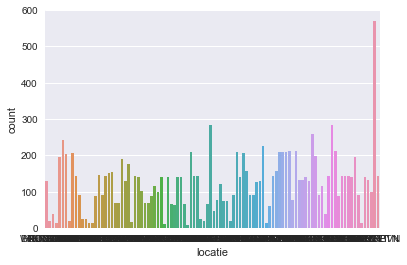

In [41]:
sns.set(style="darkgrid")
ax=sns.countplot(x="locatie",data=chlfa)

## Er blijken dus grote verschillen te zijn in de frequentie waarmee op een bepaalde locatie naar chlorofiel gemeten wordt (dus misschien kun je wel niets over "veranderingen per seizoen" zeggen

## Nu ga ik een kolom nullen toevoegen zodat ik de dataframes kan sorteren per locatie en datum

In [63]:
len(chlfa.index)

12573

In [5]:
dummy=pd.DataFrame(np.zeros((12573,1)))
chlfa=pd.concat([chlfa,dummy],axis=1)
ordered_chlfa=chlfa.groupby(['locatie','datum','meetwaarde']).sum()
ordered_chlfa.head()

Unnamed: 0    0
locatie datum      meetwaarde                 
ALMLO   2010-01-18 3.0               6494  0.0
        2010-02-15 3.0               6496  0.0
        2010-03-15 3.0               6498  0.0
        2010-04-12 6.0               6500  0.0
        2010-05-10 3.0               6503  0.0

In [7]:
ordered_chlfa.to_csv('ordered_CHLFa.csv')

## Nu ga de andere twee ook op locatie en datum groeperen

In [59]:
po4_count=po4.groupby(['locatie']).count()
len(po4_count.index)

107

## Er zijn dus vijf plaatsen waar fosfaat gemeten wordt waar geen chlorofiel gemeten wordt!

In [64]:
len(po4.index)

13414

In [8]:
dummy=pd.DataFrame(np.zeros((13414,1)))
po4=pd.concat([po4,dummy],axis=1)
ordered_po4=po4.groupby(['locatie','datum','meetwaarde']).sum()
ordered_po4.head()

Unnamed: 0    0
locatie datum      meetwaarde                 
ALMLO   2010-01-18 0.018             6997  0.0
        2010-02-15 0.022             6999  0.0
        2010-03-15 0.043             7001  0.0
        2010-04-12 0.120             7003  0.0
        2010-05-10 0.220             7005  0.0

In [12]:
c_count=po4.groupby(['locatie']).count()
len(c_count.index)

107

In [9]:
ordered_po4.to_csv('ordered_po4.csv')

In [66]:
sno3no2_count=sno3no2.groupby(['locatie']).count()
len(sno3no2_count.index)

73

## En er zijn dus heel wat locaties waar de s_nitraat-nitriet-parameter niet van bekend is!

In [67]:
len(sno3no2.index)

6858

In [10]:
dummy=pd.DataFrame(np.zeros((6858,1)))
sno3no2=pd.concat([sno3no2,dummy],axis=1)
ordered_sno3no2=sno3no2.groupby(['locatie','datum','meetwaarde']).sum()
ordered_sno3no2.head()

Unnamed: 0    0
locatie datum      meetwaarde                 
AMSDM   2006-02-23 2.37              1009  0.0
        2006-03-23 2.15              1010  0.0
        2006-04-20 2.25              1011  0.0
        2006-05-18 1.18              1012  0.0
        2006-06-15 1.43              1013  0.0

In [11]:
ordered_sno3no2.to_csv('ordered_sno3no2.csv')

In [16]:
df_4params=pd.read_csv('chlfapo4no2no3.csv')

In [36]:
df_4params.tail(10)

locatie       datum parameter  meetwaarde
52807  BELFBVN  2016-10-19       PO4      0.1230
52808  BELFBVN  2016-10-19     CHLFa      2.8000
52809  BELFBVN  2016-11-16       NO2      0.0287
52810  BELFBVN  2016-11-16       NO3      3.8500
52811  BELFBVN  2016-11-16       PO4      0.1480
52812  BELFBVN  2016-11-16     CHLFa      1.0000
52813  BELFBVN  2016-12-14       NO2      0.0348
52814  BELFBVN  2016-12-14       NO3      4.3900
52815  BELFBVN  2016-12-14       PO4      0.1050
52816  BELFBVN  2016-12-14     CHLFa      5.5000

In [33]:
#chlfa=chlfa.drop('Unnamed: 0',axis=1)
#df_4params=df_4params.drop("Unnamed: 0",axis=1)
len(df_4params.index)

52817

In [37]:
df=df_4params.pivot(columns='parameter',values='meetwaarde')


In [47]:
df2=pd.concat([df_4params.locatie,df_4params.datum,df],axis=1)

In [49]:
df2

locatie       datum  CHLFa     NO2    NO3     PO4
0      WALCRN70  2006-01-05    NaN  0.0080    NaN     NaN
1      WALCRN70  2006-01-05    NaN     NaN    NaN  0.0260
2      WALCRN70  2006-01-05    NaN     NaN  0.081     NaN
3      WALCRN70  2006-01-05   0.98     NaN    NaN     NaN
4       TERSLG4  2006-01-10    NaN  0.0310    NaN     NaN
5       TERSLG4  2006-01-10    NaN     NaN    NaN  0.0240
6       TERSLG4  2006-01-10    NaN     NaN  0.158     NaN
7       TERSLG4  2006-01-10   2.68     NaN    NaN     NaN
8       TERSLG4  2006-01-24    NaN  0.0350    NaN     NaN
9       TERSLG4  2006-01-24    NaN     NaN    NaN  0.0230
10      TERSLG4  2006-01-24    NaN     NaN  0.185     NaN
11      TERSLG4  2006-01-24   1.50     NaN    NaN     NaN
12      TERSLG4  2006-02-22    NaN  0.0220    NaN     NaN
13      TERSLG4  2006-02-22    NaN     NaN    NaN  0.0220
14      TERSLG4  2006-02-22    NaN     NaN  0.211     NaN
15      TERSLG4  2006-02-22   6.06     NaN    NaN     NaN
16     WALCRN70  2006-02-23    NaN  0.0020    NaN     NaN
17     WALCRN70  2006-02-23    NaN     NaN    NaN  0.0170
18     WALCRN70  2006-02-23    NaN     NaN  0.118     NaN
19     WALCRN70  2006-02-23   1.26     NaN    NaN     NaN
20      TERSLG4  2006-03-15    NaN  0.0120    NaN     NaN
21      TERSLG4  2006-03-15    NaN     NaN    NaN  0.0120
22      TERSLG4  2006-03-15    NaN     NaN  0.228     NaN
23      TERSLG4  2006-03-15   7.52     NaN    NaN     NaN
24     WALCRN70  2006-03-17    NaN  0.0010    NaN     NaN
25     WALCRN70  2006-03-17    NaN     NaN    NaN  0.0240
26     WALCRN70  2006-03-17    NaN     NaN  0.168     NaN
27     WALCRN70  2006-03-17   1.84     NaN    NaN     NaN
28      TERSLG4  2006-04-05    NaN  0.0040    NaN     NaN
29      TERSLG4  2006-04-05    NaN     NaN    NaN  0.0030
...         ...         ...    ...     ...    ...     ...
52787   BELFBVN  2016-06-01    NaN     NaN    NaN  0.1010
52788   BELFBVN  2016-06-01  18.00     NaN    NaN     NaN
52789   BELFBVN  2016-06-29    NaN  0.0324    NaN     NaN
52790   BELFBVN  2016-06-29    NaN     NaN  3.130     NaN
52791   BELFBVN  2016-06-29    NaN     NaN    NaN  0.0945
52792   BELFBVN  2016-06-29   2.80     NaN    NaN     NaN
52793   BELFBVN  2016-07-27    NaN  0.0175    NaN     NaN
52794   BELFBVN  2016-07-27    NaN     NaN  3.210     NaN
52795   BELFBVN  2016-07-27    NaN     NaN    NaN  0.1010
52796   BELFBVN  2016-07-27   1.00     NaN    NaN     NaN
52797   BELFBVN  2016-08-24    NaN  0.0124    NaN     NaN
52798   BELFBVN  2016-08-24    NaN     NaN  3.330     NaN
52799   BELFBVN  2016-08-24    NaN     NaN    NaN  0.0873
52800   BELFBVN  2016-08-24   2.80     NaN    NaN     NaN
52801   BELFBVN  2016-09-21    NaN  0.0211    NaN     NaN
52802   BELFBVN  2016-09-21    NaN     NaN  3.090     NaN
52803   BELFBVN  2016-09-21    NaN     NaN    NaN  0.0873
52804   BELFBVN  2016-09-21  11.00     NaN    NaN     NaN
52805   BELFBVN  2016-10-19    NaN  0.0174    NaN     NaN
52806   BELFBVN  2016-10-19    NaN     NaN  3.200     NaN
52807   BELFBVN  2016-10-19    NaN     NaN    NaN  0.1230
52808   BELFBVN  2016-10-19   2.80     NaN    NaN     NaN
52809   BELFBVN  2016-11-16    NaN  0.0287    NaN     NaN
52810   BELFBVN  2016-11-16    NaN     NaN  3.850     NaN
52811   BELFBVN  2016-11-16    NaN     NaN    NaN  0.1480
52812   BELFBVN  2016-11-16   1.00     NaN    NaN     NaN
52813   BELFBVN  2016-12-14    NaN  0.0348    NaN     NaN
52814   BELFBVN  2016-12-14    NaN     NaN  4.390     NaN
52815   BELFBVN  2016-12-14    NaN     NaN    NaN  0.1050
52816   BELFBVN  2016-12-14   5.50     NaN    NaN     NaN

[52817 rows x 6 columns]

In [50]:
dummy=pd.DataFrame(np.zeros((52818,1)))
df2=pd.concat([df2,dummy],axis=1)



Unnamed: 0    0
locatie datum      meetwaarde                 
AMSDM   2006-02-23 2.37              1009  0.0
        2006-03-23 2.15              1010  0.0
        2006-04-20 2.25              1011  0.0
        2006-05-18 1.18              1012  0.0
        2006-06-15 1.43              1013  0.0

In [71]:
df2.head()

locatie       datum  CHLFa    NO2    NO3    PO4    0
0  WALCRN70  2006-01-05    NaN  0.008    NaN    NaN  0.0
1  WALCRN70  2006-01-05    NaN    NaN    NaN  0.026  0.0
2  WALCRN70  2006-01-05    NaN    NaN  0.081    NaN  0.0
3  WALCRN70  2006-01-05   0.98    NaN    NaN    NaN  0.0
4   TERSLG4  2006-01-10    NaN  0.031    NaN    NaN  0.0

In [90]:
ordered_df2=df2.groupby(['locatie','datum']).sum()

In [91]:
ordered_df2.head()

CHLFa   NO2   NO3    PO4    0
locatie datum                                    
ALMLO   2010-01-18    3.0  0.02  1.69  0.018  0.0
        2010-02-15    3.0  0.01  2.13  0.022  0.0
        2010-03-15    3.0  0.03  1.97  0.043  0.0
        2010-04-12    6.0  0.04  2.00  0.120  0.0
        2010-05-10    3.0  0.04  1.69  0.220  0.0

In [89]:
print(df2.loc[df2['locatie']=='ALMLO',:])

      locatie       datum  CHLFa   NO2   NO3      PO4    0
27467   ALMLO  2010-01-18    NaN   NaN  1.69      NaN  0.0
27468   ALMLO  2010-01-18    3.0   NaN   NaN      NaN  0.0
27472   ALMLO  2010-01-18    NaN  0.02   NaN      NaN  0.0
27474   ALMLO  2010-01-18    NaN   NaN   NaN  0.01800  0.0
27475   ALMLO  2010-02-15    NaN   NaN  2.13      NaN  0.0
27476   ALMLO  2010-02-15    3.0   NaN   NaN      NaN  0.0
27480   ALMLO  2010-02-15    NaN  0.01   NaN      NaN  0.0
27482   ALMLO  2010-02-15    NaN   NaN   NaN  0.02200  0.0
27483   ALMLO  2010-03-15    NaN   NaN  1.97      NaN  0.0
27484   ALMLO  2010-03-15    3.0   NaN   NaN      NaN  0.0
27488   ALMLO  2010-03-15    NaN  0.03   NaN      NaN  0.0
27490   ALMLO  2010-03-15    NaN   NaN   NaN  0.04300  0.0
27491   ALMLO  2010-04-12    NaN   NaN  2.00      NaN  0.0
27492   ALMLO  2010-04-12    6.0   NaN   NaN      NaN  0.0
27496   ALMLO  2010-04-12    NaN  0.04   NaN      NaN  0.0
27498   ALMLO  2010-04-12    NaN   NaN   NaN  0.12000  0

In [74]:
df2.loc[df2.locatie=='ALMLO',:]

locatie       datum  CHLFa   NO2   NO3      PO4    0
27467   ALMLO  2010-01-18    NaN   NaN  1.69      NaN  0.0
27468   ALMLO  2010-01-18    3.0   NaN   NaN      NaN  0.0
27472   ALMLO  2010-01-18    NaN  0.02   NaN      NaN  0.0
27474   ALMLO  2010-01-18    NaN   NaN   NaN  0.01800  0.0
27475   ALMLO  2010-02-15    NaN   NaN  2.13      NaN  0.0
27476   ALMLO  2010-02-15    3.0   NaN   NaN      NaN  0.0
27480   ALMLO  2010-02-15    NaN  0.01   NaN      NaN  0.0
27482   ALMLO  2010-02-15    NaN   NaN   NaN  0.02200  0.0
27483   ALMLO  2010-03-15    NaN   NaN  1.97      NaN  0.0
27484   ALMLO  2010-03-15    3.0   NaN   NaN      NaN  0.0
27488   ALMLO  2010-03-15    NaN  0.03   NaN      NaN  0.0
27490   ALMLO  2010-03-15    NaN   NaN   NaN  0.04300  0.0
27491   ALMLO  2010-04-12    NaN   NaN  2.00      NaN  0.0
27492   ALMLO  2010-04-12    6.0   NaN   NaN      NaN  0.0
27496   ALMLO  2010-04-12    NaN  0.04   NaN      NaN  0.0
27498   ALMLO  2010-04-12    NaN   NaN   NaN  0.12000  0.0
27503   ALMLO  2010-05-10    NaN   NaN  1.69      NaN  0.0
27504   ALMLO  2010-05-10    3.0   NaN   NaN      NaN  0.0
27505   ALMLO  2010-05-10    NaN  0.04   NaN      NaN  0.0
27506   ALMLO  2010-05-10    NaN   NaN   NaN  0.22000  0.0
27507   ALMLO  2010-06-07    NaN   NaN  1.73      NaN  0.0
27508   ALMLO  2010-06-07   12.0   NaN   NaN      NaN  0.0
27512   ALMLO  2010-06-07    NaN  0.04   NaN      NaN  0.0
27514   ALMLO  2010-06-07    NaN   NaN   NaN  0.32000  0.0
27515   ALMLO  2010-07-05    NaN   NaN  1.43      NaN  0.0
27516   ALMLO  2010-07-05   12.0   NaN   NaN      NaN  0.0
27520   ALMLO  2010-07-05    NaN  0.01   NaN      NaN  0.0
27522   ALMLO  2010-07-05    NaN   NaN   NaN  0.02700  0.0
27523   ALMLO  2010-08-02    NaN   NaN  1.27      NaN  0.0
27524   ALMLO  2010-08-02    5.0   NaN   NaN      NaN  0.0
...       ...         ...    ...   ...   ...      ...  ...
28136   ALMLO  2016-05-30    NaN   NaN   NaN  0.00675  0.0
28138   ALMLO  2016-05-30   23.0   NaN   NaN      NaN  0.0
28139   ALMLO  2016-06-27    NaN   NaN  1.70      NaN  0.0
28142   ALMLO  2016-06-27    NaN  0.01   NaN      NaN  0.0
28144   ALMLO  2016-06-27    NaN   NaN   NaN  0.00385  0.0
28146   ALMLO  2016-06-27    5.7   NaN   NaN      NaN  0.0
28147   ALMLO  2016-07-25    NaN   NaN  1.18      NaN  0.0
28150   ALMLO  2016-07-25    NaN  0.01   NaN      NaN  0.0
28152   ALMLO  2016-07-25    NaN   NaN   NaN  0.00586  0.0
28154   ALMLO  2016-07-25    2.8   NaN   NaN      NaN  0.0
28155   ALMLO  2016-08-22    NaN   NaN  1.24      NaN  0.0
28158   ALMLO  2016-08-22    NaN  0.01   NaN      NaN  0.0
28160   ALMLO  2016-08-22    NaN   NaN   NaN  0.00423  0.0
28162   ALMLO  2016-08-22    5.8   NaN   NaN      NaN  0.0
28163   ALMLO  2016-09-19    NaN   NaN  1.78      NaN  0.0
28166   ALMLO  2016-09-19    NaN  0.01   NaN      NaN  0.0
28168   ALMLO  2016-09-19    NaN   NaN   NaN  0.04400  0.0
28170   ALMLO  2016-09-19   11.0   NaN   NaN      NaN  0.0
28171   ALMLO  2016-10-17    NaN   NaN  1.84      NaN  0.0
28174   ALMLO  2016-10-17    NaN  0.01   NaN      NaN  0.0
28176   ALMLO  2016-10-17    NaN   NaN   NaN  0.05320  0.0
28178   ALMLO  2016-10-17    5.6   NaN   NaN      NaN  0.0
28179   ALMLO  2016-11-14    NaN   NaN  1.88      NaN  0.0
28182   ALMLO  2016-11-14    NaN  0.01   NaN      NaN  0.0
28184   ALMLO  2016-11-14    NaN   NaN   NaN  0.04190  0.0
28186   ALMLO  2016-11-14    2.8   NaN   NaN      NaN  0.0
28187   ALMLO  2016-12-12    NaN   NaN  1.91      NaN  0.0
28190   ALMLO  2016-12-12    NaN  0.01   NaN      NaN  0.0
28192   ALMLO  2016-12-12    NaN   NaN   NaN  0.03710  0.0
28194   ALMLO  2016-12-12    1.0   NaN   NaN      NaN  0.0

[364 rows x 7 columns]